In [1]:
!git clone https://github.com/ndb796/bing_image_downloader

fatal: destination path 'bing_image_downloader' already exists and is not an empty directory.


In [9]:
import os
import shutil

directory_list = [
    '../dataset/train01/',
    '../dataset/test01/',
]

for dir in directory_list:
    os.makedirs(dir)

In [10]:
from bing_image_downloader.bing_image_downloader import downloader

downloader.download(query= '박서준', limit= 100, output_dir= './', adult_filter_off= False, force_replace= False, timeout= 60)
downloader.download(query= '강동원', limit= 100, output_dir= './', adult_filter_off= False, force_replace= False, timeout= 60)
downloader.download(query= '손석구', limit= 100, output_dir= './', adult_filter_off= False, force_replace= False, timeout= 60)

[Info] Indexing page: 1
[Info] Indexed 35 Images on Page 1.
#1 이미지 다운로드 (https://i.pinimg.com/originals/36/73/b1/3673b1623d29e3272fcc2f9431a401c7.jpg)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (https://img4.yna.co.kr/etc/inner/KR/2021/07/08/AKR20210708140600005_01_i_P4.jpg)
[Info] Issue getting: https://img4.yna.co.kr/etc/inner/KR/2021/07/08/AKR20210708140600005_01_i_P4.jpg
[Error] <urlopen error [SSL: UNSAFE_LEGACY_RENEGOTIATION_DISABLED] unsafe legacy renegotiation disabled (_ssl.c:1010)>
#2 이미지 다운로드 (https://i.pinimg.com/originals/f5/5b/48/f55b48ffbd9bd74b038220f911b0502d.jpg)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (https://img.sbs.co.kr/newsnet/etv/upload/2018/05/09/30000601383_1280.jpg)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (https://img.extmovie.com/files/attach/images/135/233/685/090/3170d4180a41bd59be951fc60bf614ee.jpg)
#4 파일 다운로드가 완료되었습니다.
#5 이미지 다운로드 (https://img.sbs.co.kr/newsnet/etv/upload/2018/05/09/30000601386_1280.jpg)
#5 파일 다운로드가 완료되었습니다.
#6 이미지 다운로드 (http://img.etoday.co.kr/pto_db/2018/03/

In [6]:
os.listdir('손석구')

['image_1.jpg',
 'image_10.jpg',
 'image_100.jpg',
 'image_11.png',
 'image_12.jpg',
 'image_13.jpg',
 'image_14.jpg',
 'image_15.jpg',
 'image_16.jpg',
 'image_17.jpg',
 'image_18.jpg',
 'image_19.jpg',
 'image_2.jpg',
 'image_20.jpg',
 'image_21.jpg',
 'image_22.jpg',
 'image_23.jpg',
 'image_24.jpg',
 'image_25.jpeg',
 'image_26.jpg',
 'image_27.jpg',
 'image_28.jpg',
 'image_29.jpg',
 'image_3.jpg',
 'image_30.jpg',
 'image_31.jpg',
 'image_32.jpg',
 'image_33.jpg',
 'image_34.jpg',
 'image_35.jpg',
 'image_36.jpg',
 'image_37.jpg',
 'image_38.jpg',
 'image_39.png',
 'image_4.jpg',
 'image_40.jpg',
 'image_41.jpg',
 'image_42.jpg',
 'image_43.jpg',
 'image_44.jpg',
 'image_45.jpg',
 'image_46.jpg',
 'image_47.jpg',
 'image_48.jpg',
 'image_49.jpg',
 'image_5.jpg',
 'image_50.jpg',
 'image_51.jpg',
 'image_52.jpg',
 'image_53.jpg',
 'image_54.jpg',
 'image_55.jpg',
 'image_56.jpg',
 'image_57.jpg',
 'image_58.jpg',
 'image_59.jpeg',
 'image_6.jpg',
 'image_60.jpg',
 'image_61.jpg',


In [11]:
def dataset_split(query, train_cnt):
    for dir in directory_list:
        if not os.path.isdir(dir + '/' + query):
            os.makedirs(dir + query)
    
    cnt = 0

    for file_name in os.listdir(query):
        if cnt < train_cnt:
            shutil.move(query + '/' + file_name, '../dataset/train01/'+ query + '/' + file_name)
        else:
            shutil.move(query + '/' + file_name, '../dataset/test01/'+ query + '/' + file_name)

        cnt += 1

    shutil.rmtree(query)

dataset_split('박서준', 60)
dataset_split('강동원', 60)
dataset_split('손석구', 60)

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, models, transforms
import numpy as np
import time

In [14]:
transforms_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

transforms_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_datasets = datasets.ImageFolder(root= '../dataset/train01', transform= transforms_train)
test_datasets = datasets.ImageFolder(root= '../dataset/test01', transform= transforms_test)

In [15]:
train_datasets

Dataset ImageFolder
    Number of datapoints: 178
    Root location: ../dataset/train01
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [17]:
train_dataloader = torch.utils.data.DataLoader(train_datasets, batch_size= 4, shuffle= True)
test_dataloader = torch.utils.data.DataLoader(test_datasets, batch_size= 4, shuffle= True)

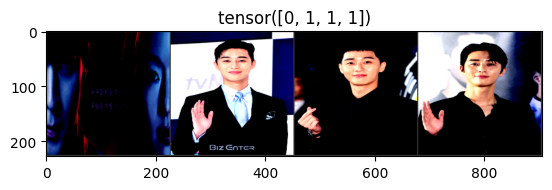

In [18]:
import matplotlib.pyplot as plt

def imshow(img, title):
    img = img.numpy().transpose([1, 2, 0])

    mean = np.array([0.229, 0.224, 0.225])
    std = np.array([0.485, 0.456, 0.406])

    img = std * img + mean
    img = np.clip(img, 0, 1)

    plt.imshow(img)
    plt.title(title)
    plt.show()

images, labels = next(iter(train_dataloader))
images_data = torchvision.utils.make_grid(images)

imshow(images_data, labels)

In [19]:
train_datasets.classes

['강동원', '박서준', '손석구']

In [20]:
model = models.resnet34(pretrained= True)

for param in model.parameters():
    param.requires_grad = False

model.fc = nn.Linear(in_features= 512, out_features= 3, bias= True)

c:\DL\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\DL\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [21]:
from tensorboardX import SummaryWriter
import tqdm

writer = SummaryWriter()
optimizer = optim.Adam(model.parameters(), lr= 1e-3)
criterion = nn.CrossEntropyLoss()
epochs = 50
step = 0

device = 'cuda' if torch.cuda.is_available else 'cpu'
model.to(device)

for epoch in range(epochs):
    for data, labels in tqdm.tqdm(train_dataloader):
        optimizer.zero_grad()
        pred = model(data.to(device))
        loss = criterion(pred, labels.to(device))
        writer.add_scalar('Loss/train', loss.item(), step)
        loss.backward()
        optimizer.step()
        step += 1

    print('loss', loss.item())

 29%|██▉       | 13/45 [00:01<00:03,  8.76it/s]c:\DL\.venv\Lib\site-packages\PIL\Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
100%|██████████| 45/45 [00:05<00:00,  8.83it/s]


loss 0.6027077436447144


100%|██████████| 45/45 [00:03<00:00, 13.60it/s]


loss 0.8229126930236816


100%|██████████| 45/45 [00:03<00:00, 12.13it/s]


loss 2.4175686836242676


100%|██████████| 45/45 [00:03<00:00, 12.94it/s]


loss 0.8726428747177124


100%|██████████| 45/45 [00:03<00:00, 12.85it/s]


loss 0.40128540992736816


100%|██████████| 45/45 [00:03<00:00, 11.75it/s]


loss 1.0681980848312378


100%|██████████| 45/45 [00:03<00:00, 12.08it/s]


loss 0.6791567206382751


100%|██████████| 45/45 [00:03<00:00, 12.11it/s]


loss 0.44996094703674316


100%|██████████| 45/45 [00:03<00:00, 12.81it/s]


loss 0.5749465227127075


100%|██████████| 45/45 [00:03<00:00, 12.86it/s]


loss 1.2360180616378784


100%|██████████| 45/45 [00:03<00:00, 12.76it/s]


loss 0.20711110532283783


100%|██████████| 45/45 [00:03<00:00, 12.84it/s]


loss 0.549291729927063


100%|██████████| 45/45 [00:03<00:00, 12.88it/s]


loss 0.2603471279144287


100%|██████████| 45/45 [00:03<00:00, 12.75it/s]


loss 1.2106767892837524


100%|██████████| 45/45 [00:03<00:00, 12.85it/s]


loss 0.29626715183258057


100%|██████████| 45/45 [00:03<00:00, 12.80it/s]


loss 0.3696802258491516


100%|██████████| 45/45 [00:03<00:00, 12.85it/s]


loss 0.7229547500610352


100%|██████████| 45/45 [00:03<00:00, 12.79it/s]


loss 0.41046613454818726


100%|██████████| 45/45 [00:03<00:00, 13.05it/s]


loss 0.3056037425994873


100%|██████████| 45/45 [00:03<00:00, 12.76it/s]


loss 0.556220293045044


100%|██████████| 45/45 [00:03<00:00, 12.87it/s]


loss 0.07833261787891388


100%|██████████| 45/45 [00:03<00:00, 12.83it/s]


loss 0.6890881061553955


100%|██████████| 45/45 [00:03<00:00, 12.79it/s]


loss 0.18885277211666107


100%|██████████| 45/45 [00:03<00:00, 13.24it/s]


loss 0.4621097445487976


100%|██████████| 45/45 [00:03<00:00, 12.93it/s]


loss 1.4467432498931885


100%|██████████| 45/45 [00:03<00:00, 12.87it/s]


loss 0.12749677896499634


100%|██████████| 45/45 [00:03<00:00, 12.91it/s]


loss 0.08678768575191498


100%|██████████| 45/45 [00:03<00:00, 12.83it/s]


loss 1.549778699874878


100%|██████████| 45/45 [00:03<00:00, 12.98it/s]


loss 1.4484467506408691


100%|██████████| 45/45 [00:03<00:00, 12.94it/s]


loss 1.6475474834442139


100%|██████████| 45/45 [00:03<00:00, 12.91it/s]


loss 0.2869296669960022


100%|██████████| 45/45 [00:03<00:00, 12.88it/s]


loss 0.125152587890625


100%|██████████| 45/45 [00:03<00:00, 12.84it/s]


loss 0.5773314833641052


100%|██████████| 45/45 [00:03<00:00, 13.07it/s]


loss 0.20331180095672607


100%|██████████| 45/45 [00:03<00:00, 12.87it/s]


loss 1.4837168455123901


100%|██████████| 45/45 [00:03<00:00, 12.84it/s]


loss 0.6656228303909302


100%|██████████| 45/45 [00:03<00:00, 13.08it/s]


loss 0.1845911145210266


100%|██████████| 45/45 [00:03<00:00, 13.04it/s]


loss 0.5787255167961121


100%|██████████| 45/45 [00:03<00:00, 12.98it/s]


loss 0.10001496225595474


100%|██████████| 45/45 [00:03<00:00, 12.91it/s]


loss 1.705962061882019


100%|██████████| 45/45 [00:03<00:00, 12.84it/s]


loss 0.33844882249832153


100%|██████████| 45/45 [00:03<00:00, 12.89it/s]


loss 0.6150528788566589


100%|██████████| 45/45 [00:03<00:00, 13.17it/s]


loss 0.5960897207260132


100%|██████████| 45/45 [00:03<00:00, 12.92it/s]


loss 0.3055395781993866


100%|██████████| 45/45 [00:03<00:00, 12.92it/s]


loss 0.2755509912967682


100%|██████████| 45/45 [00:03<00:00, 13.27it/s]


loss 0.582500696182251


100%|██████████| 45/45 [00:03<00:00, 12.92it/s]


loss 0.714501142501831


100%|██████████| 45/45 [00:03<00:00, 12.76it/s]


loss 0.13326692581176758


100%|██████████| 45/45 [00:03<00:00, 12.71it/s]


loss 0.5500953197479248


100%|██████████| 45/45 [00:03<00:00, 12.73it/s]

loss 1.3739242553710938


예측 결과: tensor([1, 2, 2, 0], device='cuda:0'), 정답: tensor([1, 2, 1, 0])


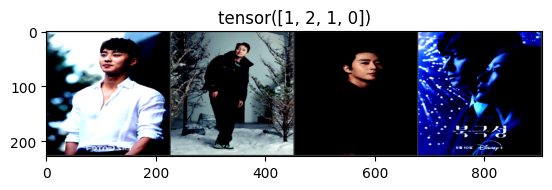

예측 결과: tensor([2, 2, 0, 1], device='cuda:0'), 정답: tensor([2, 2, 0, 1])


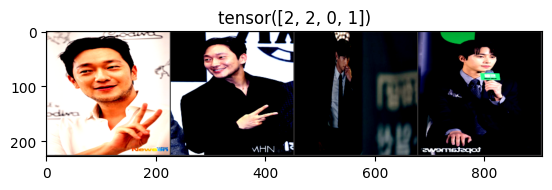

예측 결과: tensor([2, 2, 2, 1], device='cuda:0'), 정답: tensor([2, 2, 2, 1])


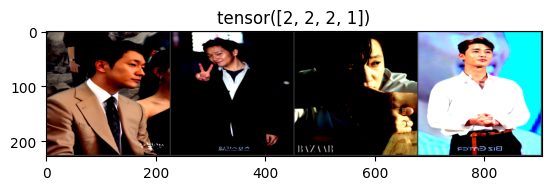

예측 결과: tensor([1, 1, 0, 2], device='cuda:0'), 정답: tensor([1, 1, 0, 2])


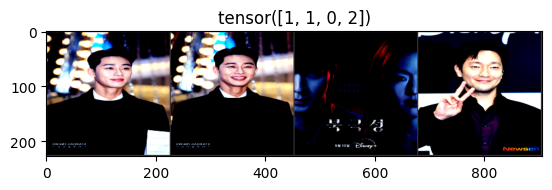

예측 결과: tensor([0, 0, 2, 0], device='cuda:0'), 정답: tensor([0, 0, 2, 0])


c:\DL\.venv\Lib\site-packages\PIL\Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


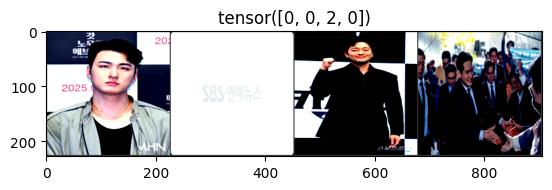

예측 결과: tensor([1, 1, 2, 0], device='cuda:0'), 정답: tensor([1, 1, 2, 0])


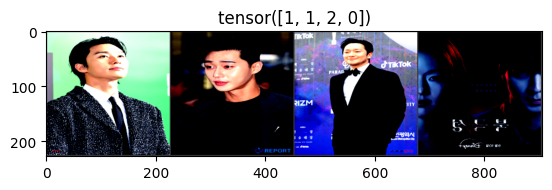

예측 결과: tensor([1, 0, 1, 1], device='cuda:0'), 정답: tensor([1, 0, 1, 1])


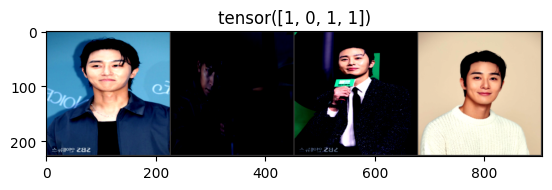

예측 결과: tensor([0, 2, 0, 0], device='cuda:0'), 정답: tensor([0, 2, 0, 0])


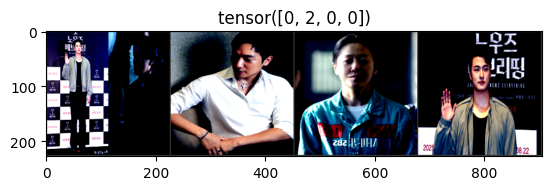

예측 결과: tensor([1, 0, 2, 0], device='cuda:0'), 정답: tensor([1, 0, 2, 0])


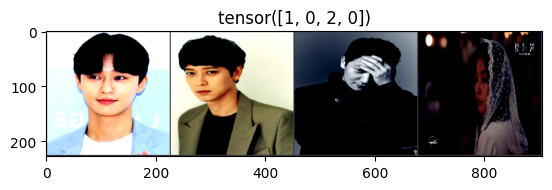

예측 결과: tensor([1, 2, 0, 0], device='cuda:0'), 정답: tensor([1, 2, 0, 0])


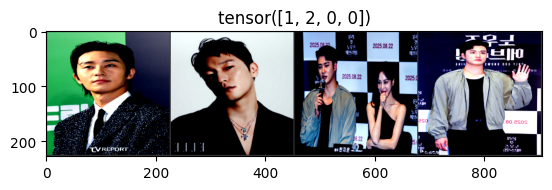

예측 결과: tensor([2, 0, 2, 1], device='cuda:0'), 정답: tensor([2, 0, 2, 1])


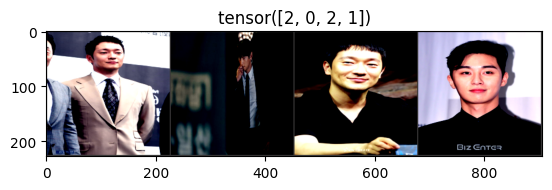

예측 결과: tensor([1, 2, 2, 2], device='cuda:0'), 정답: tensor([1, 2, 2, 2])


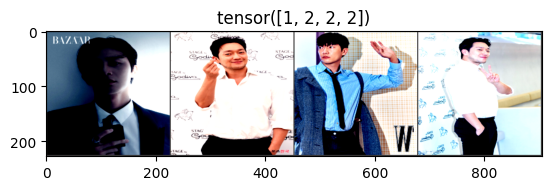

예측 결과: tensor([0, 2, 0, 1], device='cuda:0'), 정답: tensor([0, 2, 0, 2])


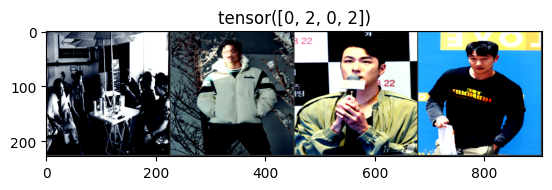

예측 결과: tensor([1, 2, 0, 2], device='cuda:0'), 정답: tensor([1, 2, 0, 2])


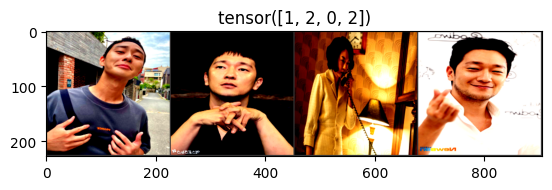

예측 결과: tensor([2, 1, 2, 1], device='cuda:0'), 정답: tensor([1, 1, 1, 1])


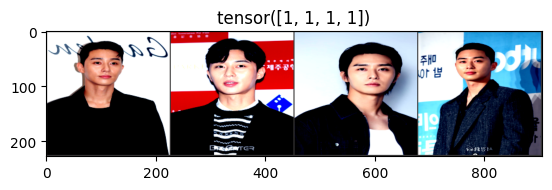

예측 결과: tensor([2, 2, 2, 0], device='cuda:0'), 정답: tensor([2, 2, 1, 0])


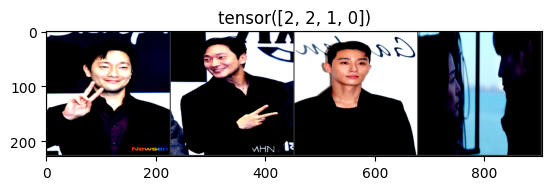

예측 결과: tensor([2, 2, 0, 1], device='cuda:0'), 정답: tensor([0, 0, 2, 1])


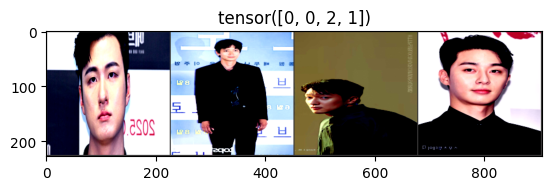

예측 결과: tensor([1, 2, 2, 1], device='cuda:0'), 정답: tensor([1, 2, 2, 1])


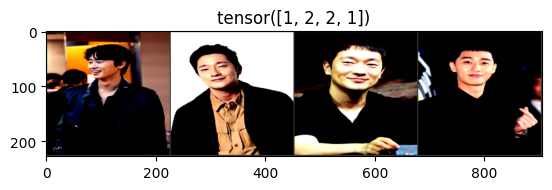

예측 결과: tensor([2, 1, 2, 0], device='cuda:0'), 정답: tensor([2, 1, 2, 0])


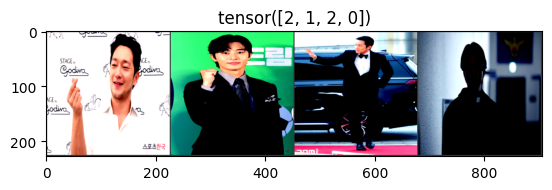

예측 결과: tensor([0, 0, 2, 0], device='cuda:0'), 정답: tensor([0, 0, 2, 0])


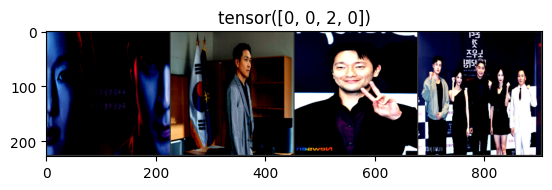

예측 결과: tensor([0, 2, 0, 2], device='cuda:0'), 정답: tensor([0, 2, 0, 0])


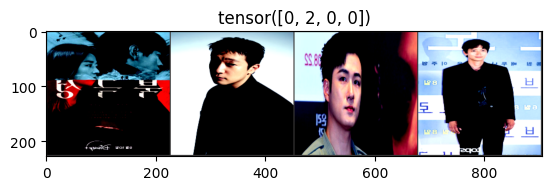

예측 결과: tensor([0, 1, 1, 2], device='cuda:0'), 정답: tensor([0, 1, 1, 2])


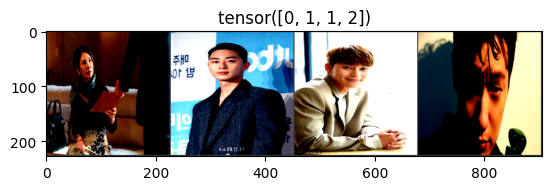

예측 결과: tensor([1, 2, 0, 1], device='cuda:0'), 정답: tensor([1, 2, 0, 1])


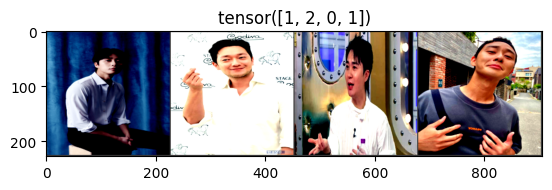

예측 결과: tensor([2, 2, 1, 2], device='cuda:0'), 정답: tensor([2, 2, 1, 0])


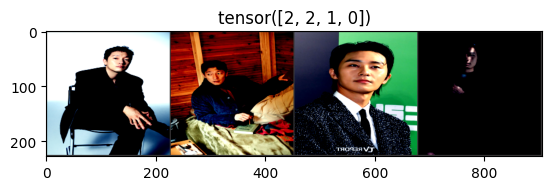

예측 결과: tensor([2, 0, 2, 0], device='cuda:0'), 정답: tensor([1, 0, 2, 2])


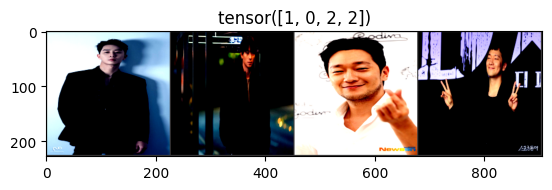

예측 결과: tensor([2, 1, 1, 1], device='cuda:0'), 정답: tensor([2, 1, 1, 1])


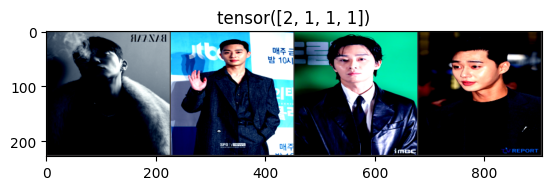

예측 결과: tensor([0, 0, 0, 1], device='cuda:0'), 정답: tensor([0, 0, 0, 1])


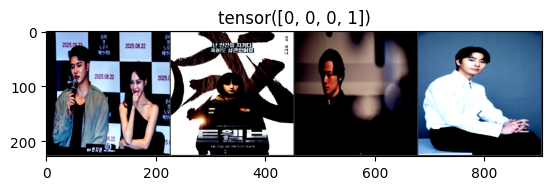

예측 결과: tensor([2, 1, 1, 1], device='cuda:0'), 정답: tensor([2, 1, 1, 1])


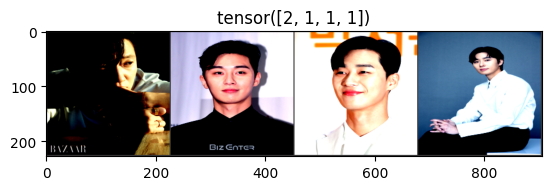

예측 결과: tensor([2, 1, 1, 0], device='cuda:0'), 정답: tensor([2, 1, 1, 0])


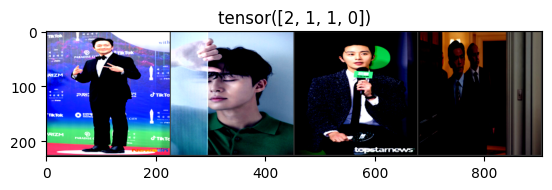

예측 결과: tensor([2, 0, 0], device='cuda:0'), 정답: tensor([2, 0, 0])


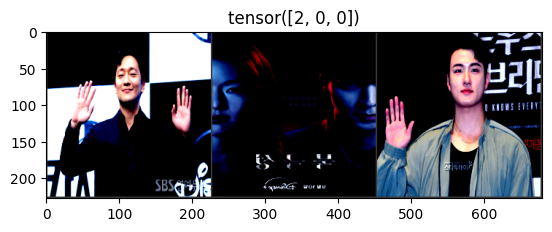

최종 정확도:  tensor([0.0420, 0.0252, 0.0252], device='cuda:0')


In [22]:
model.eval()
with torch.no_grad():
    for data, label in test_dataloader:
        pred = model(data.to(device))
        pred = torch.max(pred, 1)[1]

        total_pred = pred + torch.sum(pred == label.to(device).data)

        print(f'예측 결과: {pred}, 정답: {label}')
        images_data = torchvision.utils.make_grid(data)
        imshow(images_data.to('cpu'), label)

print('최종 정확도: ', total_pred/len(test_datasets))

In [24]:
from PIL import Image

image = Image.open('C:/DL/data/4.jpg')
image = transforms_test(image).unsqueeze(0).to(device)

result = model(image)
result

tensor([[-1.0425, -3.4723,  1.8933]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [26]:
torch.save(model.state_dict(), 'mymodel01.pth')

In [27]:
torch.save(model, 'my_model01.pth')